Correlation with 'quality':
 fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64
Accuracy Score: 0.996875
Confusion Matrix:
 [[  0   1]
 [  0 319]]


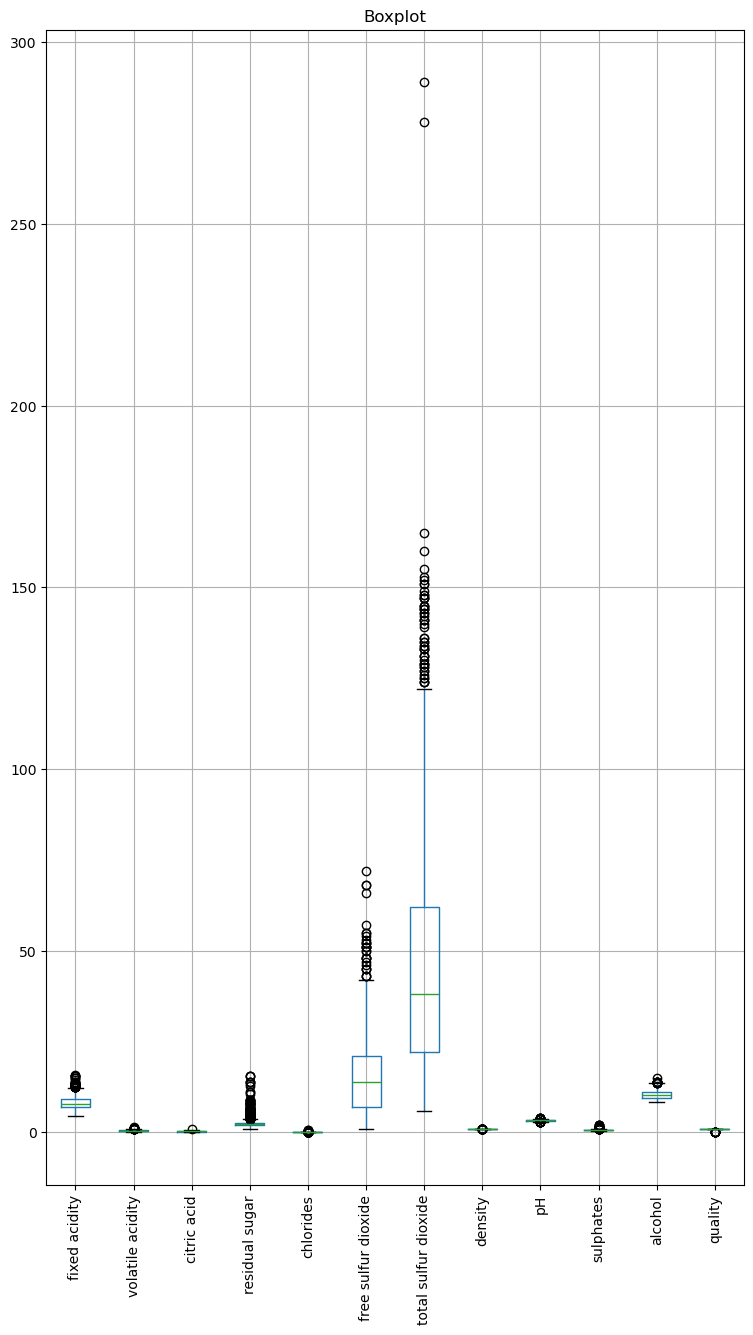

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('wine.csv')

correlation_matrix = df.corr()['quality']
print("Correlation with 'quality':\n", correlation_matrix)

df['quality'] = np.where(df['quality'] >= 4, 1, 0)

X = df.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(9, 15))
df.boxplot()
plt.title('Boxplot')
plt.xticks(rotation=90)
plt.show()


Accuracy Score: 0.984375


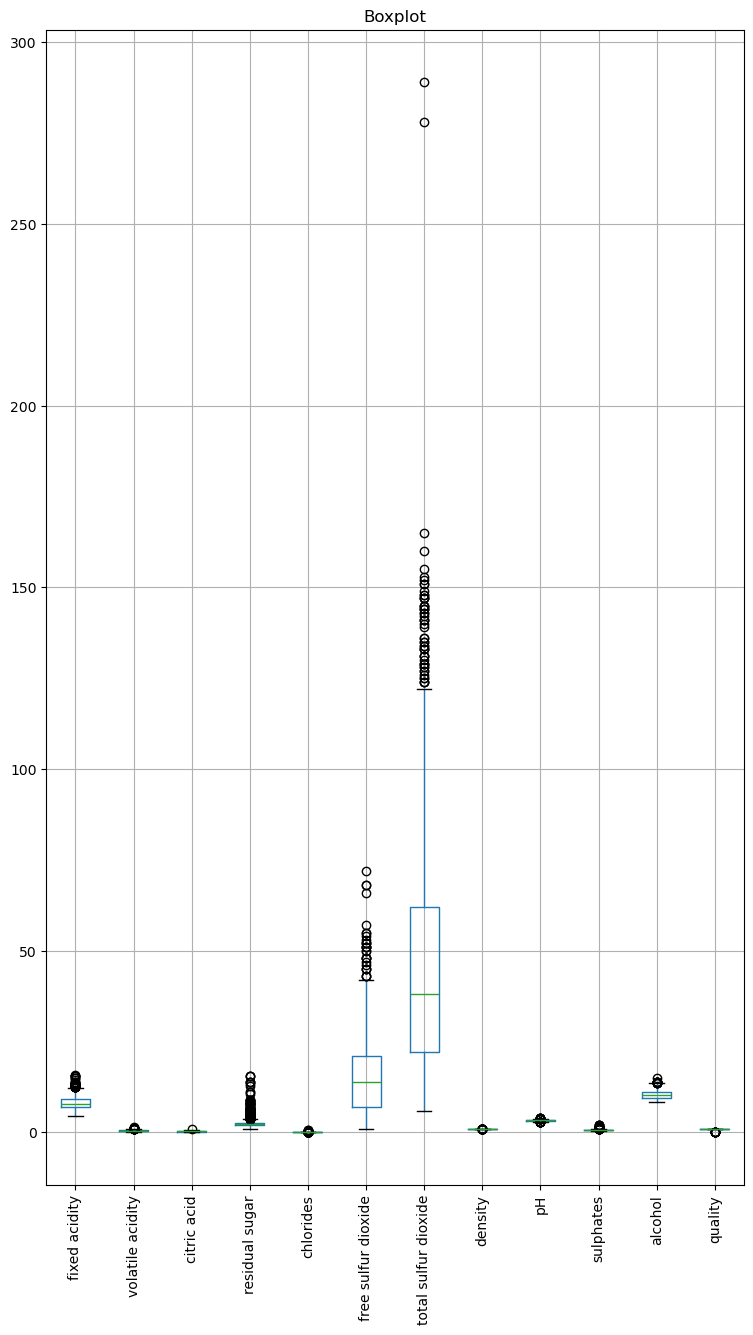

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def logistic_regression(X, y, learning_rate=0.01, iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(iter):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        dw = np.dot(X.T, (y_pred - y)) / n_samples
        db = np.mean(y_pred - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights, bias = logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000)
y_pred = predict(X_test, weights, bias)